In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

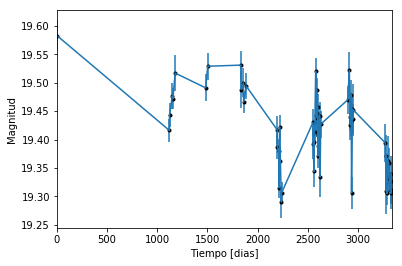

In [2]:
data = np.genfromtxt('LC_I_99669.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

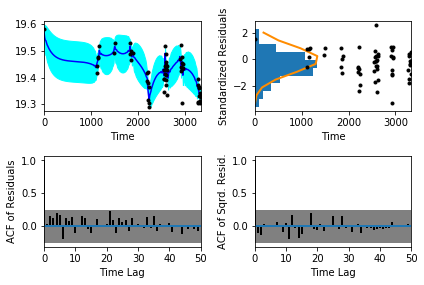

In [5]:
sample.assess_fit()

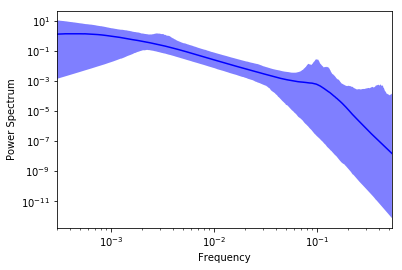

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

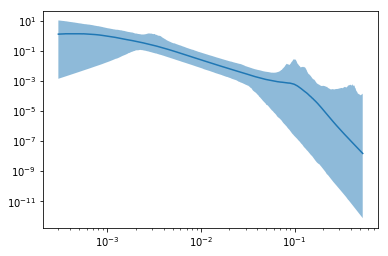

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

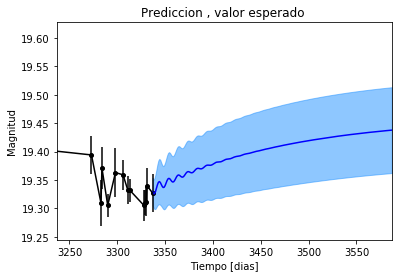

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

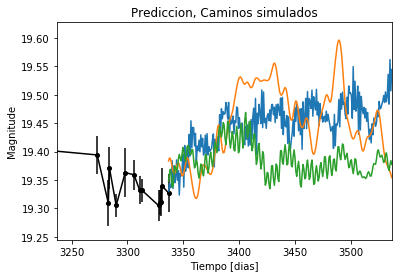

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


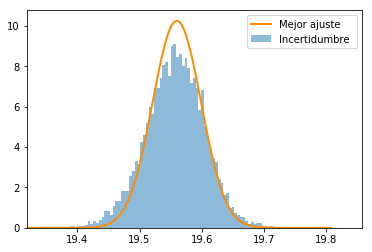

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

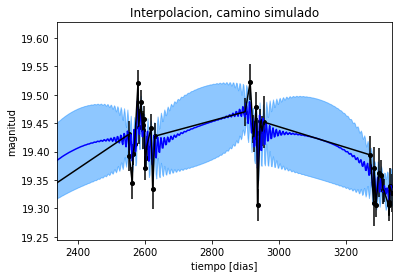

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

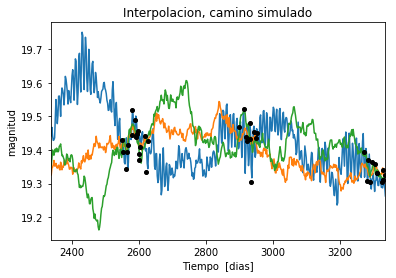

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 3
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 423.999485536
Median: 0.116871866916
Standard deviation: 0.262789907095
68% credibility interval: [ 0.08197138  0.52781124]
95% credibility interval: [ 0.          0.92434585]
99% credibility interval: [ 0.          1.03756821]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 423.999485536
Median: 0.116871866916
Standard deviation: 0.262789907095
68% credibility interval: [ 0.08197138  0.52781124]
95% credibility interval: [ 0.          0.92434585]
99% credibility interval: [ 0.          1.03756821]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 176.580196327
Median: 0.0
Standard deviation: 0.000995354343789
68% cred

Plotting parameter summary


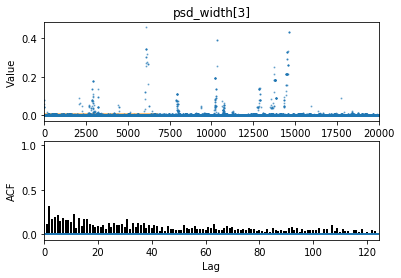

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 794.901037816
Median: 123.06958196
Standard deviation: 2.31777658741
68% credibility interval: [ 120.75451164  125.37709475]
95% credibility interval: [ 117.9419779   126.75950284]
99% credibility interval: [ 115.93040439  127.44691356]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 487.240187362
Median: 1.12490611925
Standard deviation: 2.31453498109
68% credibility interval: [ 0.13206888  4.4032413 ]
95% credibility interval: [ 0.0446398   7.58674047]
99% credibility interval: [  0.02432961  11.6231279 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 770.795040327
Median: 0.86061676282
Standard deviation: 11.5480926778
68% credibility interval: [  0.38147    13.6616683]
95% credibility interval: [  0.07351797  3

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2596.43469198
Median: 1.01189946331e-15
Standard deviation: 4.28711432767e+86
68% credibility interval: [  1.35318820e-57   6.02597307e+47]
95% credibility interval: [  9.13939046e-125   2.86862699e+067]
99% credibility interval: [  4.05131389e-130   4.41696484e+084]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1517.20871522
Median: 19.4445793492
Standard deviation: 0.0370685693867
68% credibility interval: [ 19.41764799  19.47648968]
95% credibility interval: [ 19.37979828  19.5354915 ]
99% credibility interval: [ 19.34277083  19.58227596]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 423.999485536
Median: 0.116871866916
Standard deviation: 0.262789907095
68% credibility interval: [ 0.08197138  0.52781124]
95% credibility interval: [ 0.          0.92434585]
99% credibility interval: [ 0.          1.03756821]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 423.999485536
Median: 0.116871866916
Standard deviation: 0.262789907095
68% credibility interval: [ 0.08197138  0.52781124]
95% credibility interval: [ 0.          0.92434585]
99% credibility interval: [ 0.          1.03756821]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 176.580196327
Median: 0.0
Standard deviation: 0.000995354343789
68% cred

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 794.901037816
Median: 123.06958196
Standard deviation: 2.31777658741
68% credibility interval: [ 120.75451164  125.37709475]
95% credibility interval: [ 117.9419779   126.75950284]
99% credibility interval: [ 115.93040439  127.44691356]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 716.945675886
Median: 0.00911637769895
Standard deviation: 0.136045640217
68% credibility interval: [ 0.00284665  0.05028251]
95% credibility interval: [ 0.00076145  0.5255154 ]
99% credibility interval: [  3.50582050e-04   8.84858520e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1316.61622104
Median: 0.00824382754897
Standard deviation: 0.0870376832135
68% credibility interval: [ 0.00238853  0.03363622]
95% credibility interval: [ 0.0005558   0.27930951]
99% credibility interval: [  3.23021407e-04   6.18837663e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 547.198811559
Median: 0.11416342036
Standard deviation: 

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1049.17413877
Median: 0.00744567130644
Standard deviation: 0.0062756870122
68% credibility interval: [ 0.00481278  0.01287115]
95% credibility interval: [ 0.00325427  0.02302302]
99% credibility interval: [ 0.00263155  0.03425442]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 678.396189345
Median: 1.17815652899
Standard deviation: 0.256500221831
68% credibility interval: [ 0.94906635  1.46603546]
95% credibility interval: [ 0.7798051   1.78906972]
99% credibility interval: [ 0.71729508  1.93523075]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 782.164671005
Median: 0.00227712708174
Standard deviation: 0.312672489911
68% credibility interval: [  1.29953438e-50   7.47026399e-02]
95% credibility interval: [  1.73429113e-70   1.15870728e+00]
99% credibility interval: [  1.09732202e-87   1.96432412e+00]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 716.945675886
Median: (-0.0572798904127-0.623845102575j)
Standard deviation: 1.85930220227
68% credibility interval: [-0.31593434-4.03980312j -0.01788603-3.28487136j]
95% credibility interval: [-3.30191062+0.j         -0.00478436-5.50690245j]
99% credibility interval: [ -5.55973005e+00+0.j          -2.20277198e-03-0.57434128j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1316.61622104
Median: (-0.0517974961306+0.63974684701j)
Standard deviation: 1.73936561674
68% credibility interval: [-0.21134262+5.75996428j -0.01500755+0.59262245j]
95% credibility interval: [-1.75495339+0.02896035j -0.00349218+0.j        ]
99% credibility interval: [ -3.88827171e+00+2.05612611j  -2.02960336e-03+0.51407909j]
Posterior summary for p

Plotting 2d PDF w KDE


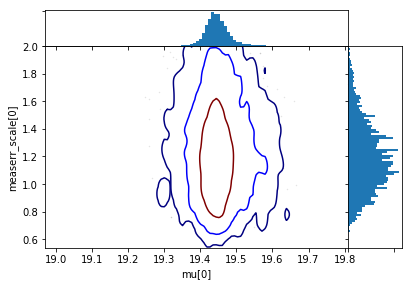

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


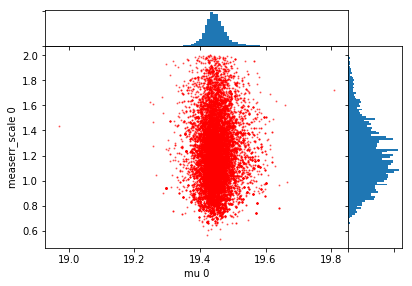

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


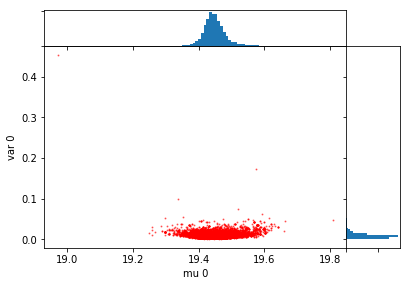

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


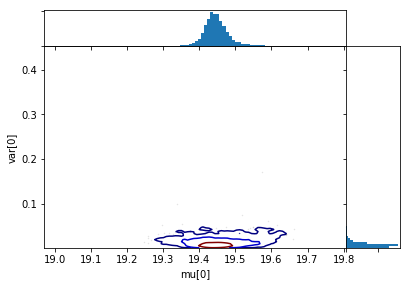

In [42]:
sample.plot_2dkde('mu', 'var', doShow=True)